In [1]:
# Import necessary packages
import numpy as np
import pandas as pd

In [2]:
# Review data frame
df = pd.read_csv('./churn_clean.csv') 

In [3]:
# Review DF
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 50 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   CaseOrder             10000 non-null  int64  
 1   Customer_id           10000 non-null  object 
 2   Interaction           10000 non-null  object 
 3   UID                   10000 non-null  object 
 4   City                  10000 non-null  object 
 5   State                 10000 non-null  object 
 6   County                10000 non-null  object 
 7   Zip                   10000 non-null  int64  
 8   Lat                   10000 non-null  float64
 9   Lng                   10000 non-null  float64
 10  Population            10000 non-null  int64  
 11  Area                  10000 non-null  object 
 12  TimeZone              10000 non-null  object 
 13  Job                   10000 non-null  object 
 14  Children              10000 non-null  int64  
 15  Age                 

In [4]:
# Check for duplicates 
duplicates = df.duplicated(keep=False) 
duplicate_rows = df[duplicates] 
print(df.duplicated().value_counts()) 
# Check for missing values 
print(df.isnull().sum()) 

False    10000
dtype: int64
CaseOrder               0
Customer_id             0
Interaction             0
UID                     0
City                    0
State                   0
County                  0
Zip                     0
Lat                     0
Lng                     0
Population              0
Area                    0
TimeZone                0
Job                     0
Children                0
Age                     0
Income                  0
Marital                 0
Gender                  0
Churn                   0
Outage_sec_perweek      0
Email                   0
Contacts                0
Yearly_equip_failure    0
Techie                  0
Contract                0
Port_modem              0
Tablet                  0
InternetService         0
Phone                   0
Multiple                0
OnlineSecurity          0
OnlineBackup            0
DeviceProtection        0
TechSupport             0
StreamingTV             0
StreamingMovies         0
PaperlessB

In [5]:
# Clean up and prepare the data 
# Rename the Outage column for proper spacing and easier understanding
df = df.rename(columns={'Outage_sec_perweek': 'Outages'})

# Rename the Monthlycharge column for proper spacing
df = df.rename(columns={'MonthlyCharge': 'Monthly_Charge'})


# Rename the Bandwidth_GB_Year column for proper spacing and easier understanding
df = df.rename(columns={'Bandwidth_GB_Year': 'Bandwidth'})

# Drop unnecessary columns from df
Cdrop = ["CaseOrder", "Zip" , "Area", "Children", "Marital", "Gender", "Churn", "Techie", "Contract",
         "Customer_id", "Interaction", "UID", "City", "County", "Lat", "Lng", "PaymentMethod",
         "TimeZone", "Email", "Contacts", "Phone", "PaperlessBilling", "InternetService", "Tablet",
         "State", "Population", "Job", "Port_modem", "Multiple", "OnlineSecurity", "OnlineBackup",
         "DeviceProtection", "TechSupport", "StreamingTV", "StreamingMovies", "Yearly_equip_failure",
         "Item1", "Item2", "Item3", "Item4", "Item5", "Item6", "Item7", "Item8"]
df.drop(columns=Cdrop, axis=1, inplace=True)

In [6]:
# Review DF after changes
df.head(3)

,Age,Income,Outages,Tenure,Monthly_Charge,Bandwidth
0,68,28561.99,7.978323,6.795513,172.455519,904.536110
1,27,21704.77,11.699080,1.156681,242.632554,800.982766
2,50,9609.57,10.752800,15.754144,159.947583,2054.706961


In [7]:
# Import packages needed for visualization
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_theme()

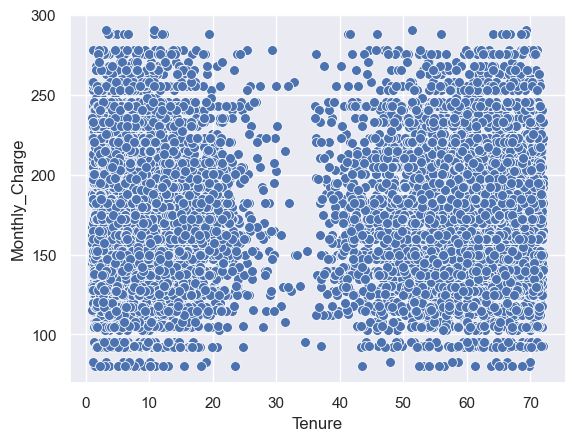

In [8]:
# Create first visualization of KMeans clusters
ax=sns.scatterplot(data=df,
                   x='Tenure',
                   y='Monthly_Charge',
                   s=50)

In [9]:
# Review the values of the clustered data
Clusterdata=df[['Tenure', 'Monthly_Charge']].describe().round(2)
Clusterdata

,Tenure,Monthly_Charge
count,10000.00,10000.00
mean,34.53,172.62
std,26.44,42.94
min,1.00,79.98
25%,7.92,139.98
50%,35.43,167.48
75%,61.48,200.73
max,72.00,290.16


In [10]:
#Normalize Data Using Z-score w/standard scaler

In [11]:
from sklearn.preprocessing import StandardScaler

In [12]:
Scaler = StandardScaler()

In [13]:
Scaled_df = Scaler.fit_transform(df[['Tenure', 'Monthly_Charge']])

In [14]:
Scaled_df = pd.DataFrame(Scaled_df, columns = ['Tenure', 'Monthly_Charge'])
Scaled_df

,Tenure,Monthly_Charge
0,-1.048746,-0.003943
1,-1.262001,1.630326
2,-0.709940,-0.295225
3,-0.659524,-1.226521
4,-1.242551,-0.528086
...,...,...
9995,1.273401,-0.294484
9996,1.002740,0.811726
9997,0.487513,-0.061729
9998,1.383018,1.863005


In [15]:
# Save scaled_df dataframe
Scaled_df.to_csv('Scaled_df.csv', index=False)

In [16]:
#Explore normalized Data

In [17]:
Scaled_df.describe().round(2)

,Tenure,Monthly_Charge
count,10000.00,10000.00
mean,0.00,-0.00
std,1.00,1.00
min,-1.27,-2.16
25%,-1.01,-0.76
50%,0.03,-0.12
75%,1.02,0.65
max,1.42,2.74


In [18]:
#Import the KMeans algorithm and create the KMeans object from SKlearn to fit on the Scaled Data

In [19]:
from sklearn.cluster import KMeans

In [20]:
k_model = KMeans(n_clusters = 2, n_init = 25, random_state=300)
k_model.fit(Scaled_df)

KMeans(n_clusters=2, n_init=25, random_state=300)

In [21]:
evaluate = pd.Series(k_model.labels_).value_counts()
evaluate

1    5002
0    4998
dtype: int64

In [22]:
# Visualize

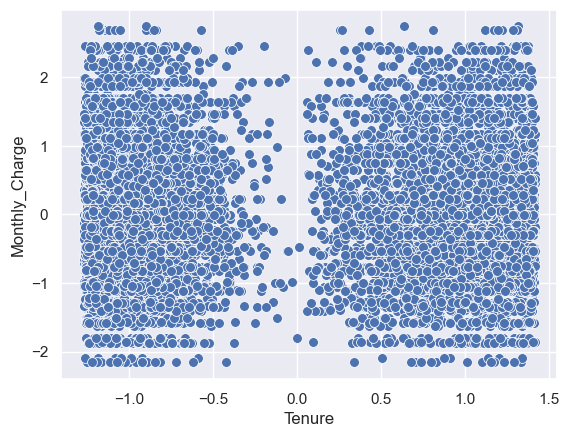

In [23]:
ax = sns.scatterplot(data=Scaled_df,
                     x='Tenure',
                     y='Monthly_Charge',
                     s=50)

In [24]:
centeroid = pd.DataFrame(k_model.cluster_centers_,columns=['Tenure', 'Monthly_Charge'])
centeroid

,Tenure,Monthly_Charge
0,-0.960919,0.003350
1,0.960151,-0.003347


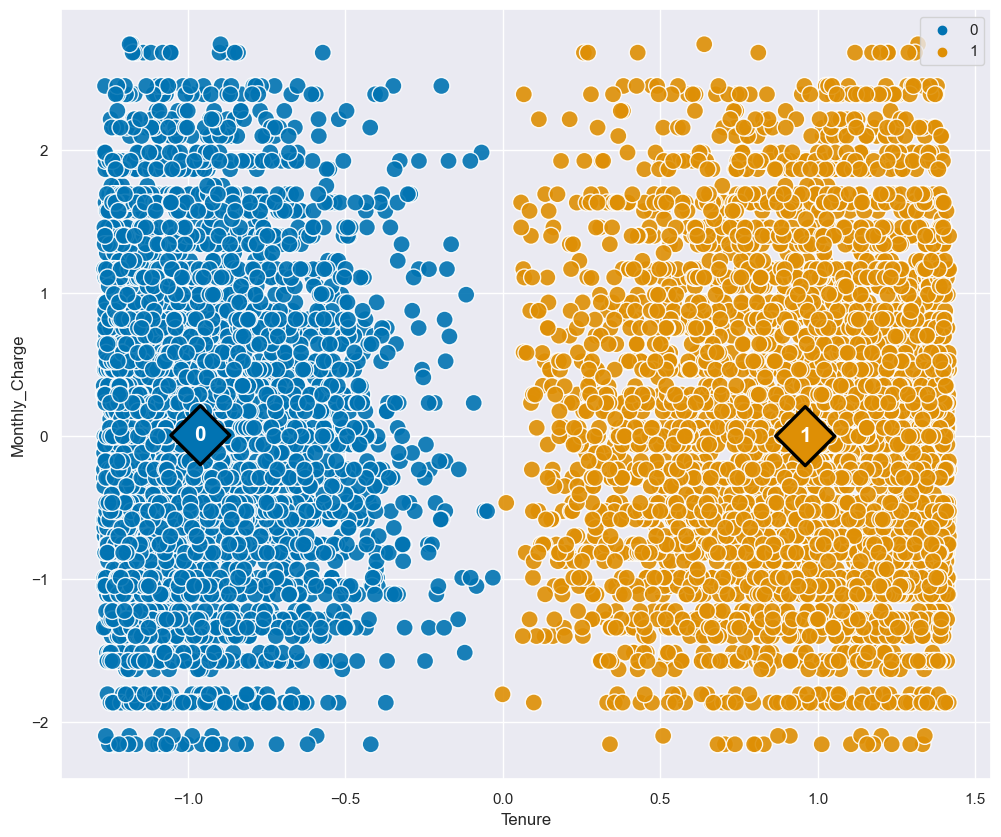

In [25]:
plt.figure (figsize = (12,10))
ax = sns.scatterplot (data = Scaled_df,
                     x='Tenure',
                     y='Monthly_Charge',
                      hue = k_model.labels_,
                      palette = 'colorblind',
                      alpha = 0.9,
                      s = 150,
                      legend = True)

ax = sns.scatterplot(data = centeroid,
                     x='Tenure',
                     y='Monthly_Charge',
                     hue = centeroid.index,
                     palette = 'colorblind',
                     s = 900,
                     marker = 'D',
                     ec = 'black',
                     legend = False)

for i in range(len(centeroid)):
    plt.text(x = centeroid.Tenure[i],
             y = centeroid.Monthly_Charge[i],
             s = i,
             horizontalalignment = 'center',
             verticalalignment = 'center',
             size = 15,
             weight = 'bold',
             color = 'white')

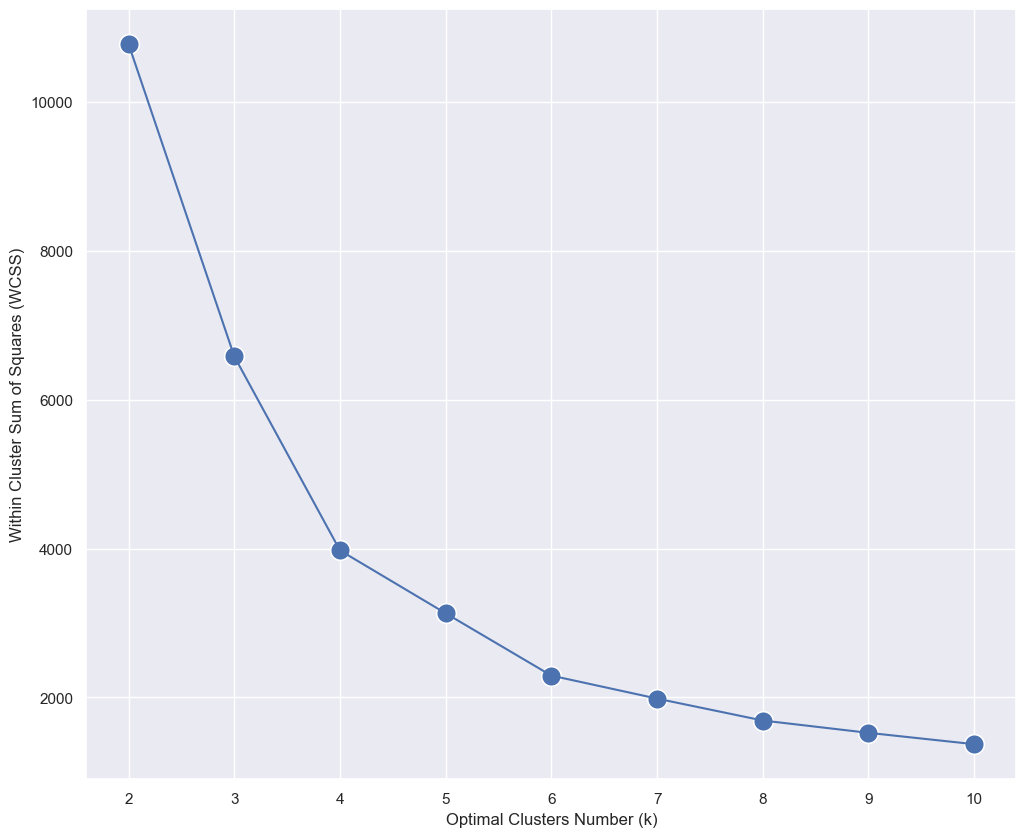

In [26]:
wcss = []
for k in range (2, 11):
        model = KMeans(n_clusters = k, n_init = 50, random_state = 300)
        model.fit (Scaled_df)
        wcss.append(model.inertia_)
wcss_s = pd.Series(wcss, index = range(2,11))

plt.figure(figsize = (12,10))
ax = sns.lineplot (y = wcss_s, x = wcss_s.index)
ax = sns.scatterplot(y = wcss_s, x = wcss_s.index, s=200)
ax = ax.set (xlabel = 'Optimal Clusters Number (k)',
             ylabel = 'Within Cluster Sum of Squares (WCSS)')

In [27]:
# Use silhouette score to double check optimal # of clusters
from sklearn.metrics import silhouette_score
ss = silhouette_score(Scaled_df, k_model.labels_)
ss

0.4765852855492949

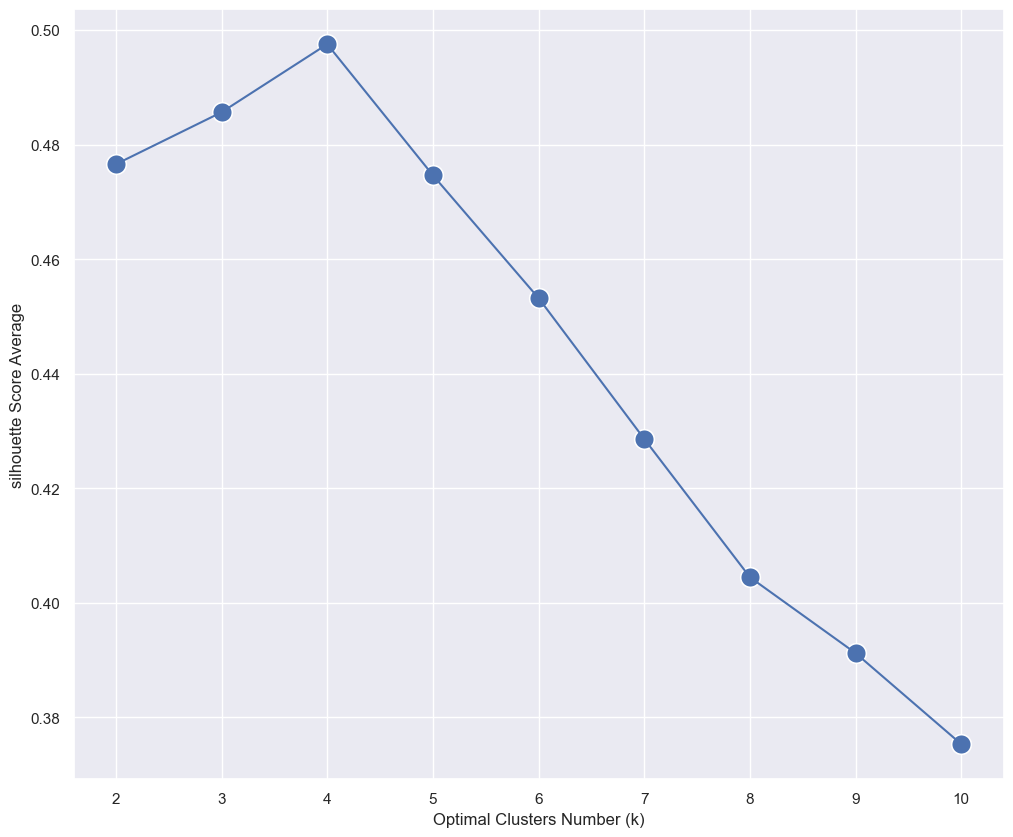

In [28]:
#Visualize
ss = []
for k in range (2,11):
    model = KMeans(n_clusters = k, n_init = 25, random_state = 300)
    model.fit(Scaled_df)
    ss.append(silhouette_score (Scaled_df, model.labels_))
    
ss_s = pd.Series (ss, index = range (2,11))

plt.figure(figsize = (12,10))
ax = sns.lineplot(y = ss_s, x=ss_s.index)
ax = sns.scatterplot(y = ss, x = ss_s.index, s=200)
ax = ax.set(xlabel = 'Optimal Clusters Number (k)',
            ylabel = 'silhouette Score Average')

In [29]:
# Create and analyze final model
Fin_model = KMeans (n_clusters = 4, n_init = 25, random_state = 300)
Fin_model.fit (Scaled_df)

KMeans(n_clusters=4, n_init=25, random_state=300)

In [30]:
fcenteroid = pd.DataFrame (Fin_model.cluster_centers_,columns = ['Tenure', 'Monthly_Charge'])
fcenteroid

,Tenure,Monthly_Charge
0,-0.962008,-0.687026
1,0.959667,-0.685052
2,0.961338,1.001063
3,-0.958912,0.980952


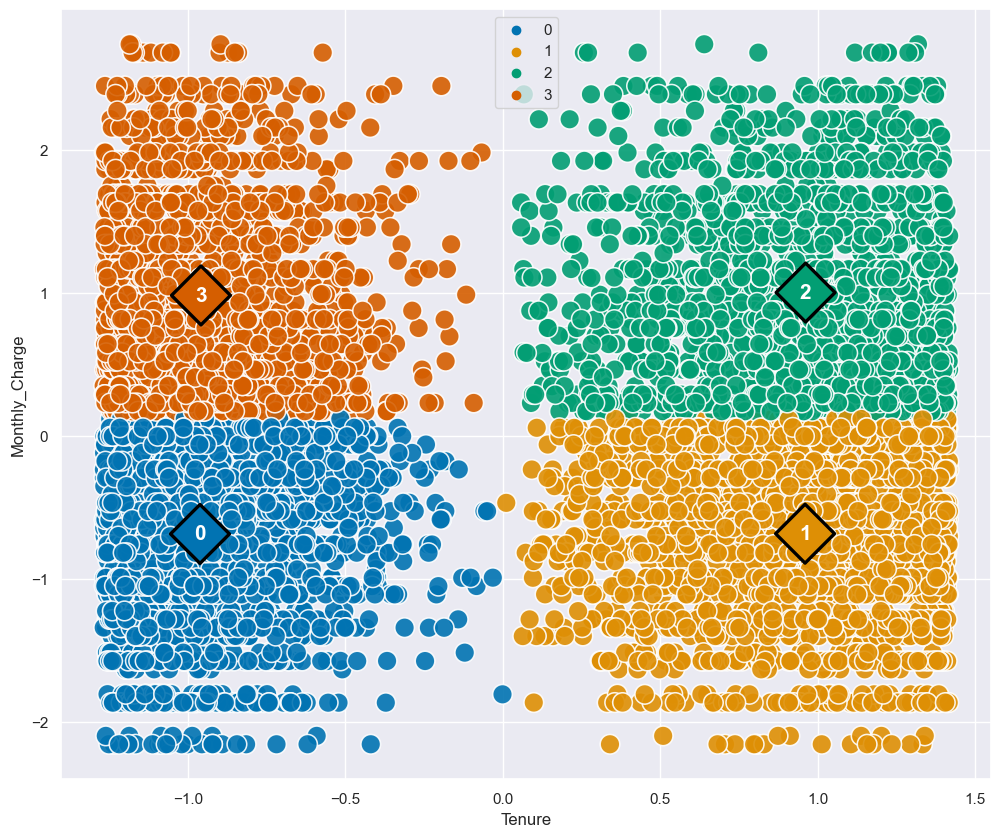

In [31]:
plt.figure(figsize = (12,10))

fx = sns.scatterplot (data = Scaled_df,
                      x='Tenure',
                      y='Monthly_Charge',
                      hue = Fin_model.labels_,
                      palette = 'colorblind',
                      alpha = 0.9,
                      s = 200,
                      legend = True)

fx = sns.scatterplot (data = fcenteroid,
                      x='Tenure',
                      y='Monthly_Charge',
                      hue = fcenteroid.index,
                      palette = 'colorblind',
                      s = 900,
                      marker = 'D',
                      ec = 'black',
                      legend = False)

for i in range (len(fcenteroid)):
            plt.text(x = fcenteroid.Tenure [i],
                     y = fcenteroid.Monthly_Charge[i],
                     s = i,
                     horizontalalignment = 'center',
                     verticalalignment = 'center',
                     size = 15,
                     weight = 'bold',
                     color = 'white')        

In [32]:
# Use silhouette score to double check optimal # of clusters
from sklearn.metrics import silhouette_score
fv = silhouette_score(Scaled_df, Fin_model.labels_)
fv

0.49754378880284506

In [33]:
df ['Cluster'] = Fin_model.labels_.tolist()
df.head (15)

,Age,Income,Outages,Tenure,Monthly_Charge,Bandwidth,Cluster
0,68,28561.99,7.978323,6.795513,172.455519,904.536110,0
1,27,21704.77,11.699080,1.156681,242.632554,800.982766,3
2,50,9609.57,10.752800,15.754144,159.947583,2054.706961,0
3,48,18925.23,14.913540,17.087227,119.956840,2164.579412,0
4,83,40074.19,8.147417,1.670972,149.948316,271.493436,0
5,83,22660.20,8.420993,7.000994,185.007692,1039.357983,3
6,79,11467.50,11.182725,13.236774,200.118516,1907.242972,3
7,30,26759.64,7.791632,4.264255,114.950905,979.612708,0
8,49,58634.51,5.739006,8.220686,117.468591,1312.874964,0
9,86,50231.40,8.707824,3.422086,162.482694,508.763791,0


In [34]:
df.agg({
        'Age' : 'median',
        'Income' : 'median',
        'Outages' : 'median',
        'Tenure' : 'median',
        'Bandwidth' : 'median',
        'Monthly_Charge' : 'median'}).round(2)

Age                  53.00
Income            33170.60
Outages              10.02
Tenure               35.43
Bandwidth          3279.54
Monthly_Charge      167.48
dtype: float64

In [35]:
df.groupby('Cluster').agg({
        'Age' : 'median',
        'Income' : 'median',
        'Outages' : 'median',
        'Tenure' : 'median',
        'Bandwidth' : 'median',
        'Monthly_Charge' : 'median'}).round(2)

,Age,Income,Outages,Tenure,Bandwidth,Monthly_Charge
Cluster,,,,,,
0,52.0,33529.19,10.05,7.90,1145.81,147.46
1,53.0,32839.44,9.88,61.33,5486.72,147.46
2,54.0,33144.92,10.20,61.62,5733.68,210.14
3,53.0,33306.54,9.96,7.94,1348.23,207.64
